In [103]:
from itertools import combinations

load('derivative.sage')
load('matroidzeta.sage')
load('fan.sage')

In [31]:
# Relax a matroid
# This is honestly terrible code; it switches between containers a billion times
def relax_circuit_hyperplane(M):

    # Get circuits and hyperplanes
    circuits = [tuple(c) for c in sorted([sorted(C) for C in M.circuits()])]
    hyperplanes = [tuple(h) for h in sorted([sorted(F) for F in M.hyperplanes()])]
    bases = [sorted (B) for B in M.bases()]

    # Find circuit-hyperplanes
    circuit_hyperplanes = list(set(circuits).intersection(hyperplanes))

    # Return if nothing to relax
    if not circuit_hyperplanes:
        print('No circuit hyperplanes to relax!')
        return None
    
    # Print circuit-hyperplanes
    for ch in enumerate(circuit_hyperplanes):
        print('{0}: '.format(ch[0]) + str(ch[1]))

    # Get circuit-hyperplane to relax
    ch = list(circuit_hyperplanes[int(input())])
    
    #print(bases)

    # Add it as a basis and create new list
    bases.append(ch)
    #new_bases = [''.join(l) for l in bases]
    
    return Matroid(bases=bases)

In [125]:
def dependent_sets_zeta(M, zeta=False):
    
    print('Matroid Rank: {0}, Matroid Size: {1}.'.format(M.rank(), M.size()))
    print('Entry (i, j) is the number of cardinality j, rank i dependent sets (one indexed):')
    
    # Get array of 0s
    res = [ [0] * (M.rank()+1) for _ in range(M.rank()) ]
    
    # Get dependent sets
    dep_sets = [M.dependent_r_sets(r) for r in range(0, M.rank()+1)]
    
    # Split dependent sets by rank
    for r, dep_set in enumerate(dep_sets):
        for dep in dep_set:
            res[M.rank(dep)][r] += 1
    
    # Print array
    for row in res[1:]:
        print(row[1:])
    
    if zeta:
        print('TZF for M: ', tzf(M))

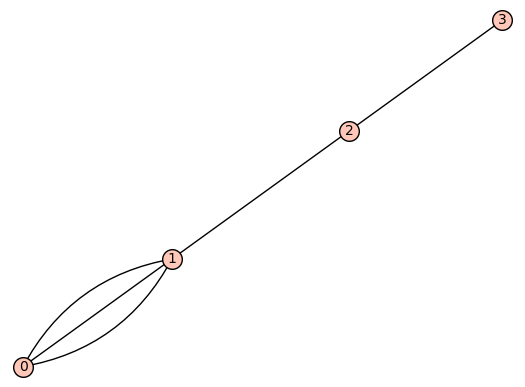

Matroid Rank: 3, Matroid Size: 5.
Entry (i, j) is the number of cardinality j, rank i dependent sets (one indexed):
[0, 3, 1]
[0, 0, 6]


In [126]:
g = Graph([(0,1,1), (0,1,2), (0,1,3), (1,2,1), (2,3,1)], multiedges=True)
g.plot().show()
m = Matroid(g)
dependent_sets_zeta(m)

In [93]:
# Displays a matroid
def display_matroid(M, d):
    if M.rank() <= 3:
        M.plot().show()
    compare_derivatives(d, M)
    dependent_sets_zeta(M)
    print('')

In [127]:
# Gets all matroids of a given rank and ground set size (up to isomorphism)
# by checking all possibe basis combinations 
def get_matroids(r, n):
    
    res = []
    res_2 = []
    
    # from itertools
    sets = combinations(list(range(n)), r)
    
    # Iterate through power set of subsets
    for b in powerset(sets):
        
        # Don't use empty
        if not b:
            continue

        # Make matroid, see if it is valid
        M = Matroid(bases=b)
        if M.size() == n and M.is_valid():
            res.append(M)
            
    # Remove isomorphic copies
    while len(res) > 0:
        res_2.append(res[0])
        res = [m for m in res[1:] if not m.is_isomorphic(res[0])]
    return res_2

# Get the set of dependent matroid we would want
M = get_matroids(4,6)

M2 = [m for m in M if len(m.dependent_r_sets(2)) > 0]
  
for i, m in enumerate(M2):
    print('Matroid index: {0}'.format(i))
    display_matroid(m, 4)

Matroid index: 0
Z_M1^(0)(0) = 1,	 Z_M2^(0)(0) = 1	(0)
Z_M1^(1)(0) = 6,	 Z_M2^(1)(0) = 6	(0)
Z_M1^(2)(0) = 48,	 Z_M2^(2)(0) = 42	(6)
Z_M1^(3)(0) = 492,	 Z_M2^(3)(0) = 336	(156)
Z_M1^(4)(0) = 6264,	 Z_M2^(4)(0) = 3024	(3240)
Matroid Rank: 4, Matroid Size: 6.
Entry (i, j) is the number of cardinality j, rank i dependent sets (one indexed):
[0, 3, 1, 0]
[0, 0, 9, 3]
[0, 0, 0, 9]

Matroid index: 1
Z_M1^(0)(0) = 1,	 Z_M2^(0)(0) = 1	(0)
Z_M1^(1)(0) = 6,	 Z_M2^(1)(0) = 6	(0)
Z_M1^(2)(0) = 46,	 Z_M2^(2)(0) = 42	(4)
Z_M1^(3)(0) = 432,	 Z_M2^(3)(0) = 336	(96)
Z_M1^(4)(0) = 4824,	 Z_M2^(4)(0) = 3024	(1800)
Matroid Rank: 4, Matroid Size: 6.
Entry (i, j) is the number of cardinality j, rank i dependent sets (one indexed):
[0, 2, 0, 0]
[0, 0, 8, 1]
[0, 0, 0, 10]

Matroid index: 2
Z_M1^(0)(0) = 1,	 Z_M2^(0)(0) = 1	(0)
Z_M1^(1)(0) = 6,	 Z_M2^(1)(0) = 6	(0)
Z_M1^(2)(0) = 44,	 Z_M2^(2)(0) = 42	(2)
Z_M1^(3)(0) = 390,	 Z_M2^(3)(0) = 336	(54)
Z_M1^(4)(0) = 4104,	 Z_M2^(4)(0) = 3024	(1080)
Matroid Rank: 4, 

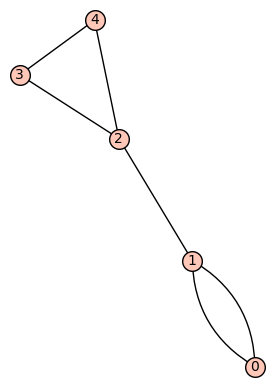

Z_M1^(0)(0) = 1,	 Z_M2^(0)(0) = 1	(0)
Z_M1^(1)(0) = 6,	 Z_M2^(1)(0) = 6	(0)
Z_M1^(2)(0) = 44,	 Z_M2^(2)(0) = 42	(2)
Z_M1^(3)(0) = 387,	 Z_M2^(3)(0) = 336	(51)
Z_M1^(4)(0) = 4002,	 Z_M2^(4)(0) = 3024	(978)
Matroid Rank: 4, Matroid Size: 6.
Entry (i, j) is the number of cardinality j, rank i dependent sets (one indexed):
[0, 1, 0, 0]
[0, 0, 5, 0]
[0, 0, 0, 9]



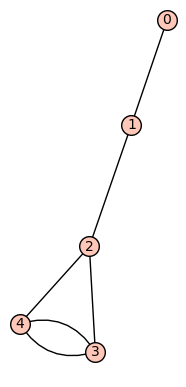

Z_M1^(0)(0) = 1,	 Z_M2^(0)(0) = 1	(0)
Z_M1^(1)(0) = 6,	 Z_M2^(1)(0) = 6	(0)
Z_M1^(2)(0) = 44,	 Z_M2^(2)(0) = 42	(2)
Z_M1^(3)(0) = 390,	 Z_M2^(3)(0) = 336	(54)
Z_M1^(4)(0) = 4104,	 Z_M2^(4)(0) = 3024	(1080)
Matroid Rank: 4, Matroid Size: 6.
Entry (i, j) is the number of cardinality j, rank i dependent sets (one indexed):
[0, 1, 0, 0]
[0, 0, 6, 1]
[0, 0, 0, 9]



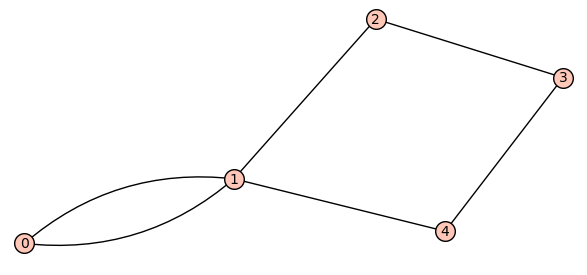

Z_M1^(0)(0) = 1,	 Z_M2^(0)(0) = 1	(0)
Z_M1^(1)(0) = 6,	 Z_M2^(1)(0) = 6	(0)
Z_M1^(2)(0) = 44,	 Z_M2^(2)(0) = 42	(2)
Z_M1^(3)(0) = 384,	 Z_M2^(3)(0) = 336	(48)
Z_M1^(4)(0) = 3920,	 Z_M2^(4)(0) = 3024	(896)
Matroid Rank: 4, Matroid Size: 6.
Entry (i, j) is the number of cardinality j, rank i dependent sets (one indexed):
[0, 1, 0, 0]
[0, 0, 4, 0]
[0, 0, 0, 7]



In [128]:
# Finds D(42) and D(32) for fourth derivative
# Create a graphic matroid
G = Graph([(0,1,1), (0,1,2),(1,2,1),(2,3,1), (2,4,1),(3,4,1)], multiedges=True)
G.plot().show()
M = Matroid(G)
display_matroid(M, 4)

G2 = Graph([(0,1,1), (3,4,2),(1,2,1),(2,3,1), (2,4,1),(3,4,1)], multiedges=True)
G2.plot().show()
M2 = Matroid(G2)
display_matroid(M2, 4)

G3 = Graph([(0,1,1), (0,1,2),(1,2,1),(2,3,1), (3,4,1),(1,4,1)], multiedges=True)
G3.plot().show()
M3 = Matroid(G3)
display_matroid(M3, 4)

In [ ]:
# Finds D31 and D21 for fourth derivative


In [77]:
def compute_fans(n):
    for i in range(0, n+1):
        if len(fan_tzfs) == i:
            z = tzf_fan(i)
            fan_tzfs.append(z)
def tzf_wheel(n):
    R.<s> = QQ['s']
    
    # cycle through some base cases ...
    if (n == 0):
        return 1
    elif (n == 1):
        return 1/(1+s)

    # prepare the fans for recursion...
    compute_fans(n-1)

    single_sum = 0
    for k in range(1, n):
        single_sum += ((-s)/(s+1))^(n-k-1) * fan_tzfs[k]
        
    # Simplified binomial sum
    non_fans = (((1-n)/(s+1)^n) * ((-s)^n-n*(-s-1)-1)) + ((n/(s+1)^n) * ((-s)^(n-1)-(n-1)*(-s-1)-1))
    
    # Note: the n = 2 triangle is a special case because the edges
    # around the wheel do not form a closed path
    if ( n > 2):
        # Brute force add cyclic matroid final case
        non_fans += ((-s)^n-1-n*(-s-1)) / ((n*s+n-1) * (s+1)^n)
    elif (n == 2):
        non_fans += 1/(1+s)

    total = n * single_sum + non_fans

    # scale the sum accordingly by the rank and size of the groundset
    if (n > 2):
        total = total * 1/(2*n*s + n)
    elif (n == 2):
        total = total / (3*s + 2)

    return total

In [78]:
tzf_wheel(6)

(-5/12*s^11 - 431/540*s^10 - 169/810*s^9 + 1627/34020*s^8 - 10421/34020*s^7 + 275/2268*s^6 + 11077/34020*s^5 - 7687/34020*s^4 - 2701/11340*s^3 + 1123/8505*s^2 + 265/1701*s + 20/567)/(s^12 + 2959/315*s^11 + 151979/3780*s^10 + 1175633/11340*s^9 + 6101191/34020*s^8 + 7459127/34020*s^7 + 2202679/11340*s^6 + 4273901/34020*s^5 + 2002849/34020*s^4 + 3509/180*s^3 + 36823/8505*s^2 + 985/1701*s + 20/567)